<a href="https://colab.research.google.com/github/jmofarias/machine_learning/blob/master/arvore_de_decisao_do_cancer_de_pulmao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação com Árvores de Decisão**

* Aprendizado supervisionado

## **Classificação de Câncer de Pulmão**

* Dataset com dados referentes ao câncer de pulmão.
* [Long Cancer](https://www.kaggle.com/yusufdede/lung-cancer-dataset)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


## 1. Importando Bibliotecas

In [ ]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Leitura dos dados utilizando a biblioteca Pandas

In [ ]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/lung_cancer_examples.csv')

In [ ]:
dados.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


## 3. Limpeza e organização dos dados

In [ ]:
# verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [ ]:
# excluir colunas irrelevantes
dados = dados.drop(columns=['Name', 'Surname'])
dados.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


## 4. Re-escala dos dados

In [ ]:
# dados de area
area = dados.AreaQ
area

In [ ]:
# dados de fumantes
smokes = dados.Smokes
smokes

In [ ]:
# dados de alcoólicos
alcool = dados.Alkhol
alcool

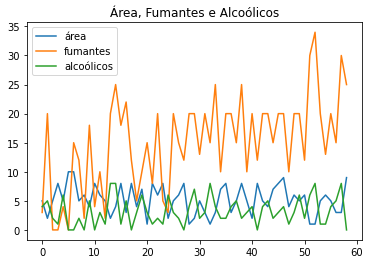

In [ ]:
# plotando área, fumantes e alcoólicos em um gráfico
plt.plot(area, label='área')
plt.plot(smokes, label='fumantes')
plt.plot(alcool, label='alcoólicos')
plt.title('Área, Fumantes e Alcoólicos')
plt.legend()
plt.show()

In [ ]:
# re-escala pelo máximo
area = area/area.max()
smokes = smokes/smokes.max()
alcool = alcool/alcool.max()

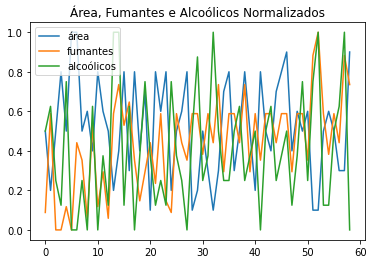

In [ ]:
# plotando área, fumantes e alcoólicos em um gráfico
plt.plot(area, label='área')
plt.plot(smokes, label='fumantes')
plt.plot(alcool, label='alcoólicos')
plt.title('Área, Fumantes e Alcoólicos Normalizados')
plt.legend()
plt.show()

## 5. Organização dos dados para modelagem

In [ ]:
# dados em atributos descritores e de classe
x = dados.iloc[:,1:]
x.head()

,Smokes,AreaQ,Alkhol,Result
0,3,5,4,1
1,20,2,5,1
2,0,5,2,0
3,0,8,1,0
4,4,5,6,1


In [ ]:
# dados em atributos de classe
y = dados.Result
y.head()

0    1
1    1
2    0
3    0
4    1
Name: Result, dtype: int64

### Dividindo dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
x_train.head()

,Smokes,AreaQ,Alkhol,Result
19,10,7,6,1
2,0,5,2,0
15,18,8,1,0
25,20,5,3,0
24,3,2,6,1


In [ ]:
y_train.head()

19    1
2     0
15    0
25    0
24    1
Name: Result, dtype: int64

## 6. Definindo algoritmo de aprendizado

* Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# definindo o modelo
classificador = DecisionTreeClassifier()

In [ ]:
# treinamento do modelo
classificador.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
# definindo o tamanho da figura
plt.rcParams["figure.figsize"] = (10,5)

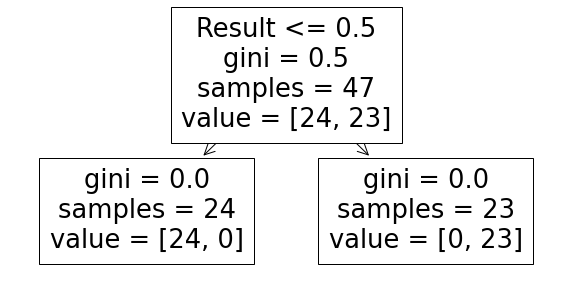

In [ ]:
plot_tree(classificador,feature_names=dados.columns[1:])
plt.show()

In [ ]:
# fazendo a classificação
classificacao = classificador.predict(x_test)
classificacao

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
for i in range(len(y_test)):
  print(y_test.iloc[i],'\t',classificacao[i])

1 	 1
1 	 1
0 	 0
1 	 1
0 	 0
0 	 0
0 	 0
0 	 0
1 	 1
0 	 0
0 	 0
1 	 1


## 7. Avaliando classificador

* Métricas para saber o comportamento do modelo

In [ ]:
# calculando acurácia
from sklearn.metrics import accuracy_score

In [ ]:
acuracia = accuracy_score(y_test,classificacao)
acuracia

1.0

In [ ]:
# calculando precisão
from sklearn.metrics import precision_score

In [ ]:
precisao = precision_score(y_test,classificacao)
precisao

1.0

In [ ]:
# calculando recall (revocação)
from sklearn.metrics import recall_score

In [ ]:
recall = recall_score(y_test,classificacao)
recall

1.0

In [ ]:
# calculando f1-score
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(y_test,classificacao)
f1

1.0

### Curva ROC

* Representação gráfica do desempenho de um classificador binário

In [ ]:
# plotando curva roc
from sklearn.metrics  import roc_curve

In [ ]:
fpr, tpr, _ = roc_curve(y_test,classificacao)

In [ ]:
fpr

array([0., 0., 1.])

In [ ]:
tpr

array([0., 1., 1.])

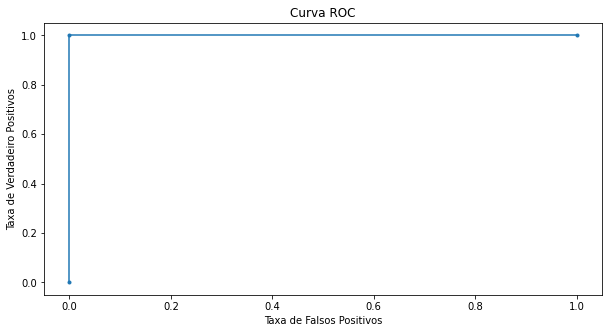

In [ ]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## Área sob a curva (*Area under the curve - AUC)*

* Área sob a curva ROC

In [ ]:
# calculando area sob a curva ROC
from sklearn.metrics import roc_auc_score

In [ ]:
erro = roc_auc_score(y_test,classificacao)
erro

1.0

## Validação cruzada

In [ ]:
# folds para validação cruzada
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
# mostrando os índices das instancias do treino e teste
for train,test in kf.split(x):
  print('Treino:',train,'\nTeste:',test)
  print('-----')

Treino: [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58] 
Teste: [ 0  1  2  3  4  5  6  7  8  9 10 11]
-----
Treino: [ 0  1  2  3  4  5  6  7  8  9 10 11 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58] 
Teste: [12 13 14 15 16 17 18 19 20 21 22 23]
-----
Treino: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58] 
Teste: [24 25 26 27 28 29 30 31 32 33 34 35]
-----
Treino: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 48 49 50 51 52 53 54 55 56 57 58] 
Teste: [36 37 38 39 40 41 42 43 44 45 46 47]
-----
Treino: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] 
Teste: [48 49 50 51 52 53 54

In [ ]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
# modelo
classificador = DecisionTreeClassifier()

In [ ]:
# calculando os scores
scores = cross_val_score(classificador,x,y,cv=10)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
scores.mean(),scores.std()

(1.0, 0.0)